# 数据读取

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

files = os.listdir('data')
dfs = []

col_name = ['date', 'region', 'area', 'rentType', 'buildingName', 'houseType', 'roomTowards', 'size', 'value']
for file in files:
    try:
        df = pd.read_csv('data/' + file, names=col_name, engine="python", encoding='gbk')
        dfs.append(df)
    except Exception as e:
        print(file, e)
df = pd.concat(dfs, ignore_index=True)
df.head(5)

qingyang_yanshikou.csv 'gbk' codec can't decode byte 0xfb in position 2539: illegal multibyte sequence


,date,region,area,rentType,buildingName,houseType,roomTowards,size,value
0,20210127,成华,八里小区,整租,万基蓝麟,3室2厅2卫,南,96平米,2600
1,20210127,成华,八里小区,整租,中铁二局玛塞城,3室1厅2卫,南,89平米,2800
2,20210127,成华,八里小区,整租,万基蓝麟,2室1厅1卫,东,72平米,2450
3,20210127,成华,八里小区,合租,府青惠园,5室0厅2卫,东南,13平米,550
4,20210127,成华,八里小区,整租,浅水半岛三期,2室1厅1卫,东北,70平米,2200


# 数据预处理

### 数值处理

In [155]:
import numpy as np

def process_value(s):
    """value为object类型，需要解析得到数字"""
    if pd.isna(s):
        return s
    try:
        value = float(s)
        if value<0 or value>100000:
            value = np.nan
    except Exception as e:
        value = np.nan
    return value

def process_size(s):
    """value为原始字符串xx平米，需要解析得到数字"""
    if pd.isna(s):
        return s
    s = s.strip("平米")
    try:
        value = float(s)
        if value<0 or value>500:
            value = np.nan
    except Exception as e:
        value = np.nan
    return value


def process_living_room(s):
    """处理原始房型：得到卧室的数量"""
    if pd.isna(s):
        return s
    try:
        value = float(s[0])
    except Exception as e:
        value = np.nan
    return value

def process_bed_room(s):
    """处理原始房型：得到客厅的数量"""
    if pd.isna(s):
        return s
    try:
        value = float(s[2])
    except Exception as e:
        value = np.nan
    return value

def process_rest_room(s):
    """处理原始房型：得到卫生间的数量"""
    if pd.isna(s):
        return s
    try:
        value = float(s[4])
    except Exception as e:
        value = np.nan
    return value

def process_room(s):
    """处理原始房型：得到所有房间的数量"""
    if pd.isna(s):
        return s
    try:
        value = float(s[0]) + float(s[2]) + float(s[4])
    except Exception as e:
        value = np.nan
    return value

df["value"] = df["value"].map(process_value)
df["size"] = df["size"].map(process_size)
df["livingRoom"] = df["houseType"].map(process_living_room)
df["bedRoom"] = df["houseType"].map(process_bed_room)
df["restRoom"] = df["houseType"].map(process_rest_room)
df["totalRoom"] = df["houseType"].map(process_room)

# 数据探索

In [156]:
# head默认显示5条数据，可以指定显示几条
df.head(5)
df.columns

Index(['date', 'region', 'area', 'rentType', 'buildingName', 'houseType',
       'roomTowards', 'size', 'value', 'livingRoom', 'bedRoom', 'restRoom',
       'totalRoom'],
      dtype='object')

In [157]:
# 查看数据维度
print(df.shape)
# 查看数据类型
print(df.dtypes)

(31086, 13)
date             object
region           object
area             object
rentType         object
buildingName     object
houseType        object
roomTowards      object
size            float64
value           float64
livingRoom      float64
bedRoom         float64
restRoom        float64
totalRoom       float64
dtype: object


In [158]:
"""查看一些汇总信息，探索各个维度值的分布情况.  
对于数值型数据describe方法会统计
count：总数
mean：均值
std：标准差
min：最小值
25%：第一四分位数或较小四分位数（Q1）：等于该样本中所有数值由小到大排列后第25%的数字。
50%：第二四分位数或中位数（Q2）：等于该样本中所有数值由小到大排列后第50%的数字。
75%：第三四分位数或较大四分位数（Q3）：等于该样本中所有数值由小到大排列后第75%的数字。
max：最大值。5个方面的信息"""
df.describe()

,size,value,livingRoom,bedRoom,restRoom,totalRoom
count,31021.000000,31010.000000,31075.000000,31075.000000,31080.000000,31074.000000
mean,77.505400,2578.515124,2.575865,1.212389,1.334299,5.122482
std,43.204651,2222.238123,1.140312,0.587687,0.580268,1.851065
min,6.000000,200.000000,1.000000,0.000000,0.000000,1.000000
25%,47.000000,1500.000000,2.000000,1.000000,1.000000,4.000000
50%,78.000000,2200.000000,3.000000,1.000000,1.000000,5.000000
75%,97.000000,3000.000000,3.000000,2.000000,2.000000,7.000000
max,490.000000,55000.000000,9.000000,9.000000,7.000000,21.000000


In [159]:
import numpy as np
"""
非数值describe方法会统计
count：总数
unique：去重后的个数
top：出现频率最高的值
freq：出现最高频率的值的频率"""
df.describe(exclude=[np.number])

,date,region,area,rentType,buildingName,houseType,roomTowards
count,31086,31085,31085,31085,31085,31085,31085
unique,2,23,171,3,4487,111,67
top,20210127,锦江,犀浦,整租,誉峰三期,2室1厅1卫,东南
freq,31085,4367,1082,26644,176,5769,10429


In [160]:
"""有很多算法要求所选取的维度之间要没有相关性，所以探索维度之间的相关性也非常重要。
Pandas提供了corr方法可以计算相关系数（默认计算皮尔逊相关系数）"""
df.corr()

,size,value,livingRoom,bedRoom,restRoom,totalRoom
size,1.000000,0.627653,0.198912,0.487868,0.369083,0.393446
value,0.627653,1.000000,0.057811,0.248578,0.276135,0.201299
livingRoom,0.198912,0.057811,1.000000,0.312392,0.589625,0.900033
bedRoom,0.487868,0.248578,0.312392,1.000000,0.359470,0.622623
restRoom,0.369083,0.276135,0.589625,0.359470,1.000000,0.790805
totalRoom,0.393446,0.201299,0.900033,0.622623,0.790805,1.000000


### 可视化

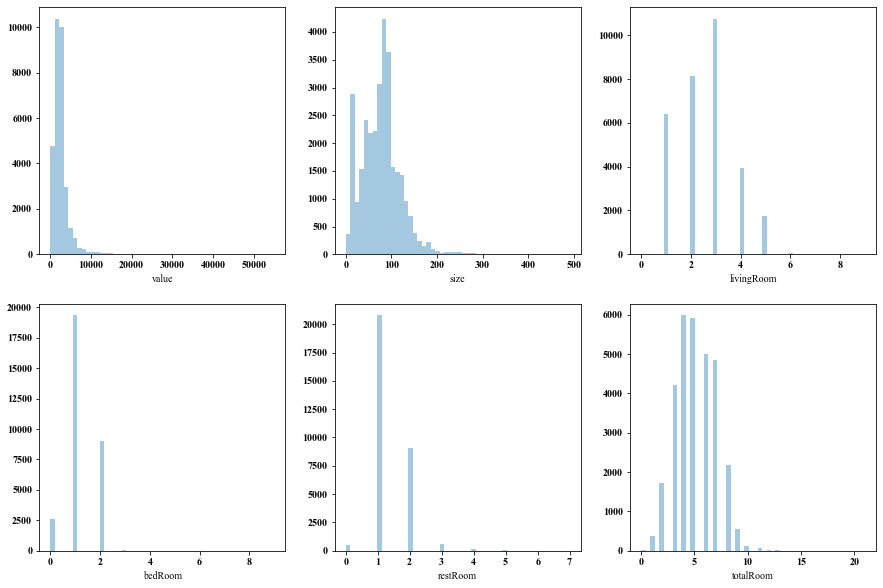

In [161]:
## 通过直方图和密度图观察特征分布
import matplotlib.pyplot as plt
plt.rc('font', family='Times New Roman')
plt.rcParams["figure.figsize"] = (15,10)
import seaborn as sns

fig, axes = plt.subplots(2, 3)
features = ["value", "size", "livingRoom", "bedRoom", "restRoom", "totalRoom"]

for i, ax in zip(range(6), axes.flat):
    feature_name = features[i]
    feature = df[feature_name].fillna(0)
    sns.distplot(feature, kde=False, ax=ax)
plt.show()

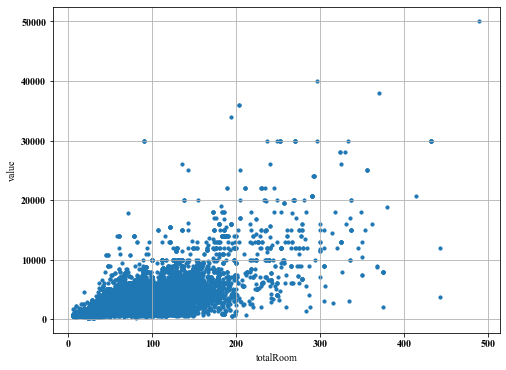

In [162]:
## 通过散点图观察相关性
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
fig, axs = plt.subplots(1, 1)

plt.scatter(df["size"], df["value"], s=10)
        # axs[0].set_xlim(0, 2)
plt.xlabel(feature_name)
plt.ylabel('value')
plt.grid(True)

plt.show()

<AxesSubplot:xlabel='livingRoom'>

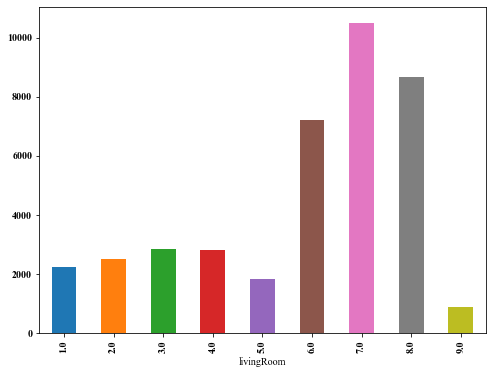

In [163]:
# 分组观察 livingRoom与value的关系
df.groupby(['livingRoom'])['value'].mean().plot(kind='bar', figsize=(8, 6))

<AxesSubplot:xlabel='bedRoom'>

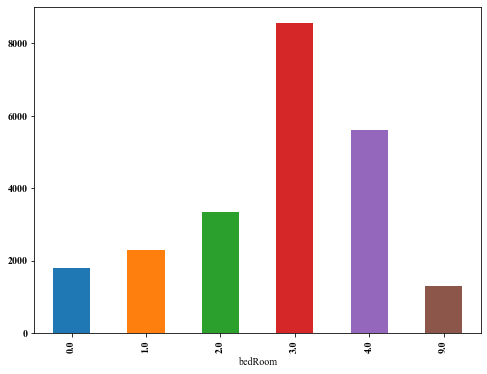

In [164]:
# 分组观察 bedRoom与value的关系
df.groupby(['bedRoom'])['value'].mean().plot(kind='bar', figsize=(8, 6))

<AxesSubplot:xlabel='restRoom'>

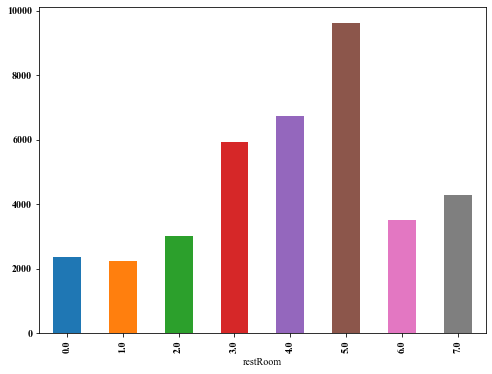

In [165]:
# 分组观察 restRoom与value的关系
df.groupby(['restRoom'])['value'].mean().plot(kind='bar', figsize=(8, 6))

<AxesSubplot:xlabel='region'>

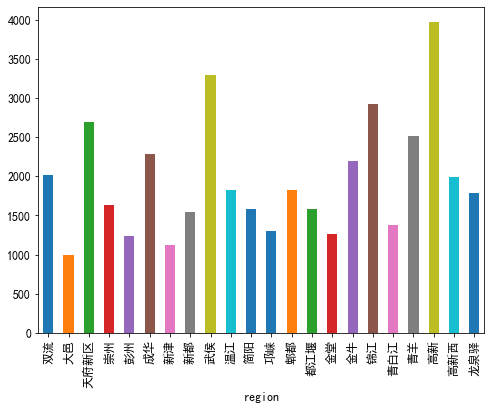

In [166]:
# 分组观察 restRoom与value的关系
font = {
    'family':'SimHei',
    'weight':'bold',
    'size':12
}
plt.rc("font", **font)
df = df.drop(df[df.region == "蒲江"].index) # region=蒲江有一条离群数据导致画图出现偏差，这里删除掉
df.groupby(['region'])['value'].mean().plot(kind='bar', figsize=(8, 6))

# 特征工程

### 离散特征处理

In [167]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# 这种写法虽然优雅，但是不方便保留列名，我们换下一种做法
"""
cat_si_step = ('si', SimpleImputer(strategy='most_frequent', fill_value=np.nan))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) #独热
cat_steps = [cat_si_step, cat_ohe_step]

cat_pipe = Pipeline(cat_steps)
cat_cols = ['date', 'region', 'area', 'rentType', 'buildingName', 'houseType',
       'roomTowards', 'size', 'value', 'livingRoom', 'bedRoom', 'restRoom',
       'totalRoom']
# cat_cols = ['Preferred Foot']

cat_transformers = [('cat', cat_pipe, cat_cols)]

ct = ColumnTransformer(transformers=cat_transformers)
df_transformed = ct.fit_transform(df)
print(df_transformed.shape)
"""

"\ncat_si_step = ('si', SimpleImputer(strategy='most_frequent', fill_value=np.nan))\ncat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) #独热\ncat_steps = [cat_si_step, cat_ohe_step]\n\ncat_pipe = Pipeline(cat_steps)\ncat_cols = ['date', 'region', 'area', 'rentType', 'buildingName', 'houseType',\n       'roomTowards', 'size', 'value', 'livingRoom', 'bedRoom', 'restRoom',\n       'totalRoom']\n# cat_cols = ['Preferred Foot']\n\ncat_transformers = [('cat', cat_pipe, cat_cols)]\n\nct = ColumnTransformer(transformers=cat_transformers)\ndf_transformed = ct.fit_transform(df)\nprint(df_transformed.shape)\n"

In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# 缺失值填补
si = SimpleImputer(strategy='most_frequent', missing_values=None)
si2 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# 将类别字符串转为计算机可以识别的数字
le = LabelEncoder()
# 独热编码
ohe = OneHotEncoder()

# 选取的离散变量
cat_cols = ['region', 'area', 'rentType','roomTowards']

df[cat_cols] = si.fit_transform(df[cat_cols])
df[cat_cols] = si2.fit_transform(df[cat_cols])
cat_df = None
for cat_col in cat_cols:
    df[cat_col+'-encoded'] = le.fit_transform(df[cat_col].astype(str))
    X = ohe.fit_transform(df[cat_col+'-encoded'].values.reshape(-1,1)).toarray()
    dfOneHot = pd.DataFrame(X, columns = [cat_col+str(int(i)) for i in range(X.shape[1])])
    cat_df = pd.concat([cat_df, dfOneHot], axis=1)

## 查看离线特征
cat_df.head()

,region0,region1,region2,region3,region4,region5,region6,region7,region8,region9,...,roomTowards57,roomTowards58,roomTowards59,roomTowards60,roomTowards61,roomTowards62,roomTowards63,roomTowards64,roomTowards65,roomTowards66
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 连续特征处理

In [170]:
# 选取的连续变量
num_cols = ['size', 'livingRoom', 'bedRoom', 'restRoom', 'totalRoom']

# 缺失值填补，用中位数
num_si_step = ('si', SimpleImputer(strategy='median',missing_values=np.nan))
# 均值-标准差归一化
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]

num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, num_cols)]

ct = ColumnTransformer(transformers=num_transformers)

num_transformed = ct.fit_transform(df)
num_df = pd.DataFrame(num_transformed, columns=num_cols)

## 查看连续特征
num_df.head()

,size,livingRoom,bedRoom,restRoom,totalRoom
0,0.429006,0.371967,1.340602,1.147661,1.014709
1,0.266703,0.371967,-0.361294,1.147661,0.474316
2,-0.127461,-0.505183,-0.361294,-0.576021,-0.606472
3,-1.495441,2.126268,-2.063189,1.147661,1.014709
4,-0.173833,-0.505183,-0.361294,-0.576021,-0.606472


In [171]:
# 处理Y值，NaN填充
mean_ = df['value'].mean()
df['value']= df['value'].fillna(mean_)

## 特征选择

In [172]:
# 组合连续和离散特征,得到最终的全部特征
X = pd.concat([cat_df, num_df], axis=1) 
y = df['value']

from sklearn.feature_selection import f_regression
# 特征选择，我们通过F-score值从全部特征中选择重要的特征
F_score, p_value = f_regression(X, y)
order = np.argsort(F_score)[::-1]
print(order)
print("特征重要性：", X.columns[order])

# 我们选择最重要的20个特征进行模型训练
featrue_num = 20
featrue_select = X.columns[order][:featrue_num]
X = X[featrue_select]
X.head(5)

[262 192 193 265 264 173  19 266 109 102   8  66  31 143  12  21  91   7
 127 255  16  15  79   9 241 155 263   0  82 189 100 110   5 184  27 188
 135 122 156  36  34   6 106  20 183 167 138  37  73 237  54 114 175 160
 120 191  55 136  85  42  30  28  80  45  88 166 111  90 229  47  94 194
 131  14 169 124 195  97 116 147 218  43 145 162 206  17 178 123 141 115
 172  53  46  10 170 250 231 104  78 154 125 148  62 187 226  76  65 144
  23 107  24  52  99 137 117  33  51  13  49  57 168 181 152  69 254 108
  95 157 140  40  32 133  98 142   2 119 256  56 185  18  50 128 247 150
 209 126 149  11 165  48 186 182 103  26 134 220  59  61 236 208 158  22
 197  25  38  96   4  83 260 153 118 179 239 242 190 201 257 243 101  74
  44 204 176 199  84 159 129  70  71  93  35 259 244  58  75 221 207 232
 219 177 230  63 139 202 253 130  64 258   3  87  81   1 235 161 112  60
 225 261 205 211  72 164 233 105 227 216  41  29  89 200 203 223 240 213
 238 198 252 180 151 224 248 214  77 234 249  86  6

,size,rentType0,rentType1,restRoom,bedRoom,area151,region19,totalRoom,area87,area80,region8,area44,area9,area121,region12,region21,area69,region7,area105,roomTowards60
0,0.429006,0.0,1.0,1.147661,1.340602,0.0,0.0,1.014709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.266703,0.0,1.0,1.147661,-0.361294,0.0,0.0,0.474316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.127461,0.0,1.0,-0.576021,-0.361294,0.0,0.0,-0.606472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.495441,1.0,0.0,1.147661,-2.063189,0.0,0.0,1.014709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.173833,0.0,1.0,-0.576021,-0.361294,0.0,0.0,-0.606472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 构造训练和测试数据

In [173]:
from sklearn.model_selection import train_test_split

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("训练集X_train个数 :", X_train.shape[0],"\t 特征个数:", X_train.shape[1],"\t 测试集X_test个数:", X_test.shape[0])

训练集X_train个数 : 24868 	 特征个数: 20 	 测试集X_test个数: 6217


# 模型训练

### LightGBM

In [175]:
# LightGBM
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

clf = LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    max_depth=-1,
    num_leaves=2 ** 7 - 1,
    learning_rate=0.01,
    n_estimators=500,
    min_split_gain=0.0,
    min_child_weight=0.001,
    subsample=0.8,
    subsample_freq=1,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
    is_unbalance=True,
    random_state=888,
    n_jobs=-1,
)

print(clf)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("真实值(前10个)", list(y_test)[:10])
print("预测值(前10个)", y_pred[:10])
print("LGBMRegressor: \n","MAE:",mean_absolute_error(y_test, y_pred),"\tMSE:",mean_squared_error(y_test, y_pred))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
              importance_type='split', is_unbalance=True, learning_rate=0.01,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=127,
              objective='regression', random_state=888, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=0.8,
              subsample_for_bin=200000, subsample_freq=1)
真实值(前10个) [4700.0, 816.0, 2400.0, 2300.0, 2300.0, 1800.0, 2500.0, 4400.0, 1900.0, 2500.0]
预测值(前10个) [4623.93965746  889.89071589 2422.57262023 1902.89937048 2501.87475205
 1558.90772966 2805.80030318 4174.13508172 1807.30221939 3090.5616826 ]
LGBMRegressor: 
 MAE: 630.1890445736294 	MSE: 1754254.0262081032


### 支持向量机 Support Vector Regression

In [ ]:
# Epsilon-Support Vector Regression.
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"C": [1,10,100,1000], 'kernel': ['linear']},
    {'C': [1,10,100,1000], 'gamma': [0.001, 0.0001], 'kernel':['rbf']},
]

SVR = SVR()

clf = GridSearchCV(SVR , param_grid ,cv = 5)
clf.fit(X_train,y_train)
# 对测试集进行预测
print(clf)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("真实值(前10个)", list(y_test)[:10])
print("预测值(前10个)", y_pred[:10])
print("SVR: \n","MAE:",mean_absolute_error(y_test, y_pred),"\tMSE:",mean_squared_error(y_test, y_pred))

### 随机森林 RandomForestRegressor

In [176]:
# 随机森林 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

clf = RandomForestRegressor()

print(clf)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("真实值(前10个)", list(y_test)[:10])
print("预测值(前10个)", y_pred[:10])
print("RandomForestRegressor: \n","MAE:",mean_absolute_error(y_test, y_pred),"\tMSE:",mean_squared_error(y_test, y_pred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
真实值(前10个) [4700.0, 816.0, 2400.0, 2300.0, 2300.0, 1800.0, 2500.0, 4400.0, 1900.0, 2500.0]
预测值(前10个) [4856.07012987  911.31814519 2652.62150987 2074.50561938 2885.09675325
 1792.46881244 2417.75434744 4360.36103389 1715.66932822 2644.1218032 ]
RandomForestRegressor: 
 MAE: 553.8859954229059 	MSE: 1624581.79745573


### XGBRegressor

In [177]:
# XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

clf = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160,
                             silent=True,objective='reg:gamma')

clf.fit(X_train,y_train)
# 对测试集进行预测
print(clf)
clf.fit(X_train,y_train)
xgb_pred = clf.predict(X_test)
print("真实值(前10个)", list(xgb_pred)[:10])
print("预测值(前10个)", xgb_pred[:10])
print("XGBRegressor: \n","MAE:",mean_absolute_error(y_test, xgb_pred),"\tMSE:",mean_squared_error(y_test, xgb_pred))

[22:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=160, n_jobs=16, num_parallel_tree=1,
             objective='reg:gamma', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=Non

### 多元线性回归 LinearRegression
因为租赁价格和各个变量不是呈简单的线性关系，所以用多元线性模型拟合效果会比较差

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

clf = LinearRegression()
# 对测试集进行预测
clf.fit(X_train,y_train)

print(clf.coef_, clf.intercept_)
linear_pred = clf.predict(X_test)
print("真实值(前10个)", list(linear_pred)[:10])
print("预测值(前10个)", linear_pred[:10])
print("LinearRegression: \n","MAE:",mean_absolute_error(y_test, linear_pred),"\tMSE:",mean_squared_error(y_test, linear_pred),"\n")

expression = "Value = {:.3f}".format(clf.intercept_)
for coef, col_name in zip(clf.coef_, X_train.columns):
    expression += " + {:.3f} * {}".format(coef, col_name)
print("线性回归表达式为: ", expression)

[1306.33017884  194.03901692  121.61561032  376.43534627   83.1938258
 2606.70922791  347.28195178 -376.11571267 1756.65504397 1359.66447255
  503.39915441 1916.94581644 2583.49146632 1042.54374459 -698.71380826
 -837.55978515 1100.75297837 -918.56078164   19.97008308 2418.48393973] 2285.4472467273313
真实值(前10个) [4510.9495682951765, 697.7052557991224, 2100.6141405142703, 2029.0423009304402, 2733.9384606348926, 876.6737468879919, 3531.9114683830453, 3370.0012404903337, 1423.268224877639, 3430.578648095614]
预测值(前10个) [4510.9495683   697.7052558  2100.61414051 2029.04230093 2733.93846063
  876.67374689 3531.91146838 3370.00124049 1423.26822488 3430.5786481 ]
LinearRegression: 
 MAE: 863.5481031676122 	MSE: 2523149.8938643276 

线性回归表达式为:  Value = 2285.447 + 1306.330 * size + 194.039 * rentType0 + 121.616 * rentType1 + 376.435 * restRoom + 83.194 * bedRoom + 2606.709 * area151 + 347.282 * region19 + -376.116 * totalRoom + 1756.655 * area87 + 1359.664 * area80 + 503.399 * region8 + 1916.946 *

### 神经网络 DNN

In [179]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 全连接神经网络,两个隐藏层，隐藏层神经元个数为[100,100]
model = keras.Sequential(
    [
        keras.layers.Dense(100, activation="relu", name="layer1", input_shape=(X_train.shape[1],)),
        keras.layers.Dense(100, activation="relu", name="layer2"),
        keras.layers.Dense(1, name="layer3"),
    ]
)

model.compile(optimizer='adam',
              loss='mean_squared_error')
print(model.summary())
history = model.fit(X_train,y_train,epochs=100,batch_size=64)
dnn_pred = model.predict(X_test)
print("真实值(前10个)", list(dnn_pred)[:10])
print("预测值(前10个)", dnn_pred[:10])
print("MLP: \n","MAE:",mean_absolute_error(y_test, dnn_pred),"\tMSE:",mean_squared_error(y_test, dnn_pred))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               2100      
_________________________________________________________________
layer2 (Dense)               (None, 100)               10100     
_________________________________________________________________
layer3 (Dense)               (None, 1)                 101       
Total params: 12,301
Trainable params: 12,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
389/389 [==============================] - 1s 884us/step - loss: 9922326.5949
Epoch 2/100
389/389 [==============================] - 0s 998us/step - loss: 2759805.8071
Epoch 3/100
389/389 [==============================] - 0s 966us/step - loss: 2307633.5622
Epoch 4/100
389/389 [==============================] - 0s 838us/step - loss: 2400605.3104
Epoch 5/100
389

389/389 [==============================] - 0s 869us/step - loss: 1765292.7605
Epoch 84/100
389/389 [==============================] - 0s 884us/step - loss: 1610673.0865
Epoch 85/100
389/389 [==============================] - 0s 928us/step - loss: 1640706.4779
Epoch 86/100
389/389 [==============================] - 0s 861us/step - loss: 1695544.2812
Epoch 87/100
389/389 [==============================] - 0s 974us/step - loss: 1650659.5139
Epoch 88/100
389/389 [==============================] - 0s 993us/step - loss: 1696638.0237
Epoch 89/100
389/389 [==============================] - 0s 895us/step - loss: 1583726.5881
Epoch 90/100
389/389 [==============================] - 0s 878us/step - loss: 1975707.4510
Epoch 91/100
389/389 [==============================] - 0s 871us/step - loss: 1788754.4926
Epoch 92/100
389/389 [==============================] - 0s 861us/step - loss: 1806256.6285
Epoch 93/100
389/389 [==============================] - 0s 886us/step - loss: 1985820.3599
Epoch 94/100

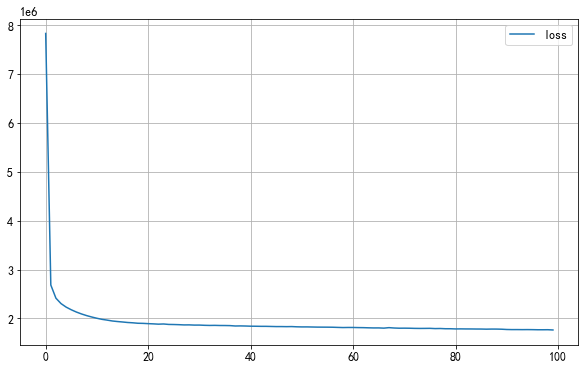

In [181]:
# 随着迭代次数的变化，loss（MSE）的下降过程
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.grid(True)
    plt.show()

plot_learning_curves(history)

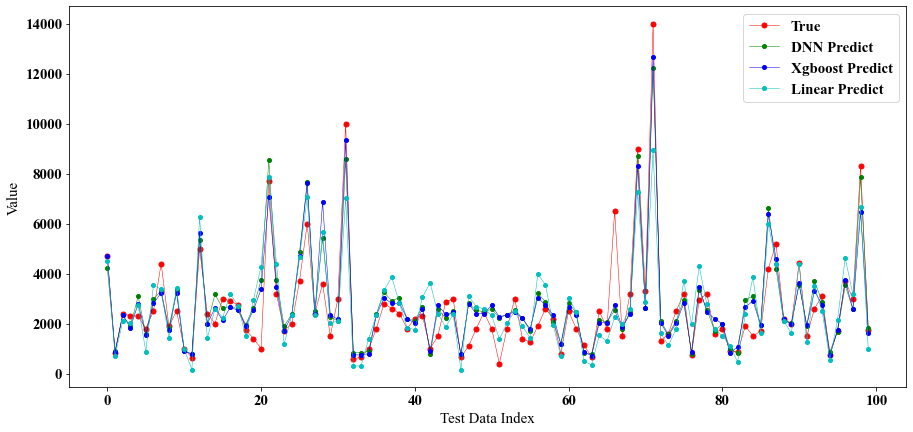

In [183]:
#通过绘制出真实值与DNN预测值、XGB预测值、线性回归预测值，观察模型的拟合情况
plt.rc('font', family='Times New Roman')
plt.figure(figsize = (15,7))

plt.plot(y_test.tolist()[0:100],label = "True",color = "r",marker = "o",linewidth=0.5, markersize=5)
plt.plot(dnn_pred.tolist()[0:100],label = "DNN Predict",color = "g",marker = "o",linewidth=0.5, markersize=4)
plt.plot(xgb_pred[0:100],label = "Xgboost Predict",color = "b",marker = "o",linewidth=0.5, markersize=4)
plt.plot(linear_pred[0:100],label = "Linear Predict",color = "c",marker = "o",linewidth=0.5, markersize=4)
plt.xlabel("Test Data Index",fontsize=15)
plt.ylabel("Value",fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# 可以看到DNN、XGBOOST拟合都很好，Linear回归拟合不够好，因为模型太简单了，不能拟合非线性关系。

### 特征重要性

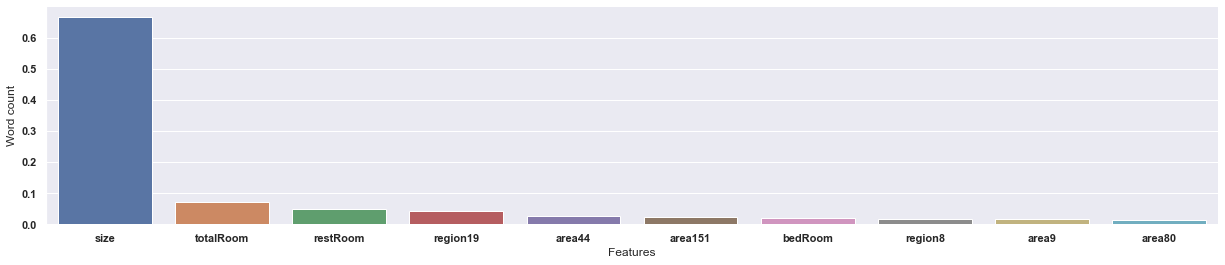

size 0.666178866631679
rentType0 0.007144659960402729
rentType1 0.006944127849556549
restRoom 0.050532893854612536
bedRoom 0.020358829674294074
area151 0.024271823083199248
region19 0.04346475981367345
totalRoom 0.0706385381199873
area87 0.007046086514903657
area80 0.01358459302245137
region8 0.018130714323868313
area44 0.02577990932276596
area9 0.016375016342445183
area121 0.009341498619705731
region12 0.006182311634416014
region21 0.006610331968603356
area69 0.0033590300566704806
region7 0.003409375234702186
area105 0.0005658559494903757
roomTowards60 8.07780225725086e-05


In [184]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=10,n_jobs=2)
clf.fit(X_train, y_train)
predict = clf.predict(X_train)
features = X_train.columns
feature_importances = clf.feature_importances_
features_df = pd.DataFrame({'Features':features,'Importance':feature_importances})
features_df.sort_values('Importance',inplace=True,ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize": (21, 4)})
sns.barplot(features_df['Features'][:10], features_df['Importance'][:10],)
plt.ylabel('Word count')
# 柱状图
sns.despine(bottom=True)
plt.show()

for col,importance in zip(features,feature_importances):
    print(col,importance)
# 可以看到size、房间总数是最要重要的几个特征

In [1]:
"""模型保存
>>> from sklearn.externals import joblib
>>> joblib.dump(clf, 'filename.pkl') 
>>> clf = joblib.load('filename.pkl') 
"""

"模型保存\nfrom sklearn.externals import joblib\njoblib.dump(clf, 'filename.pkl') \nclf = joblib.load('filename.pkl') \n"